# Proyek Analisis Data: Data Set BikeCycle
- **Nama:** Akmal Ramdani
- **Email:** akmalramdani1626@gmail.com
- **ID Dicoding:** akmal_ramdani

## Bagian Streamlit dengan Google Colab dan req.txt

Download Req.txt

In [1]:
!pip install pipreqsnb

In [2]:
!cp "/content/app.py"

cp: missing destination file operand after '/content/app.py'
Try 'cp --help' for more information.


In [4]:
!pipreqsnb

pipreqs  /content
INFO: Not scanning for jupyter notebooks.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
INFO: Successfully saved requirements file in /content/requirements.txt


In [5]:
from google.colab import files
files.download('requirements.txt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [6]:
! pip install streamlit -q
!wget -q -O - ipv4.icanhazip.com
! streamlit run app.py & npx localtunnel --port 8501

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3108, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2901, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 441, in run
    conflicts = self._determine_conflicts(to_install)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh penyewaan sepeda berdasarkan musim/bulanan/tahunan?
- Bagaimana pengaruh *weekdays* dan *weekend* terhadap penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

Sebelum melakukan tahapan data wrangling, Explolatory data analysis dan explanatory data analysis diperlukan mengimport library yang diperlukan untuk memudahkan dalam membuat simulasi visualisasi dan analisis, library yang dibutuhkan meliputi


*   Numpy
*   Pandas
*   Searborn
*   matplotlib



In [7]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

## Data Wrangling

### Gathering Data

Setelah mengimport library yang dibutuhkan tahapan selanjutnya yaitu memanggil dataset yang didapatkan dari course dicoding yaitu data Bike-sharing dataset yang dimana didalam data tersebut terdapat data day.csv dan hour.csv serta diperlukan pemanggilan data tersebut dengan bantuan library pandas sebagai berikut

In [8]:
day_df=pd.read_csv('day.csv')
hour_df=pd.read_csv('hour.csv')

### Assessing Data Awal
Setelah mengumpukan data selanjutnya didalam tahapan data wrangling yaitu assessing data yang dimana data tersebut nantinya akan dinilai apakah terdapat data yang memiliki nilai eror/null pada dataset tersebut atau data tersebut memiliki potensi yang baik untuk dianalisis lebih lanjut pada tahapan berikutnya.
Pada tahapan data assessing ini saya melakukan analisis dengan beberapa tools seperti


*   describe()
*   info()
*   duplicate()
*   duplicate().sum()
*   unique()
*   head()
*   tail()
*   sample()
*   shape
*   describe()
*   value_counts()
*   isnull() and
*   isnull().sum()






**Assessing data day**

Pada assessing data day dengan tools describe didapatkan nilai masing-masing kolom dengan nilai statistik disisi barisnya. Terdapat beberapa data yang perlu ditindak lanjuti seperti kolom yr, mnth, cnt yang harus diperbaiki dan dikonfimasi ulang dengan metode statistik yang akan dijelaskan pada section selanjutnya.

In [9]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [10]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [11]:
day_df.shape

(731, 16)

In [12]:
day_df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
726    False
727    False
728    False
729    False
730    False
Length: 731, dtype: bool

In [13]:
day_df.duplicated().sum()

0

In [14]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [15]:
day_df.duplicated().sum()

0

In [16]:
day_df['instant'].unique().sum()

267546

In [17]:
day_df['instant'].value_counts()

instant
1      1
481    1
483    1
484    1
485    1
      ..
246    1
247    1
248    1
249    1
731    1
Name: count, Length: 731, dtype: int64

In [18]:
day_df.isnull()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
727,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
728,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
729,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [19]:
day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Assessing data hour**

In [20]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [21]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [22]:
hour_df.shape

(17379, 17)

In [23]:
hour_df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
17374    False
17375    False
17376    False
17377    False
17378    False
Length: 17379, dtype: bool

In [24]:
hour_df.duplicated().sum()

0

In [25]:
hour_df['instant'].unique().sum()

151023510

In [26]:
hour_df['instant'].value_counts()

instant
1        1
11592    1
11578    1
11579    1
11580    1
        ..
5799     1
5800     1
5801     1
5802     1
17379    1
Name: count, Length: 17379, dtype: int64

In [27]:
hour_df.isnull()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
17375,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
17376,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
17377,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [28]:
hour_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Cleaning Data

Clean Days

In [29]:
day_df.rename(columns={'dteday': 'rental_date', 'yr': 'year', 'mnth': 'month', 'cnt': 'count'}, inplace=True)
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   instant      731 non-null    int64  
 1   rental_date  731 non-null    object 
 2   season       731 non-null    int64  
 3   year         731 non-null    int64  
 4   month        731 non-null    int64  
 5   holiday      731 non-null    int64  
 6   weekday      731 non-null    int64  
 7   workingday   731 non-null    int64  
 8   weathersit   731 non-null    int64  
 9   temp         731 non-null    float64
 10  atemp        731 non-null    float64
 11  hum          731 non-null    float64
 12  windspeed    731 non-null    float64
 13  casual       731 non-null    int64  
 14  registered   731 non-null    int64  
 15  count        731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [30]:
day_df.to_csv("day_clean.csv")


In [31]:
dayc_df=pd.read_csv("day_clean.csv")
dayc_df.head(2)

,Unnamed: 0,instant,rental_date,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801


Clean data Hours

In [32]:
hour_df.rename(columns={'dteday': 'rental_date', 'yr': 'year', 'mnth': 'month', 'hr': 'hour', 'cnt': 'count'}, inplace=True)
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   instant      17379 non-null  int64  
 1   rental_date  17379 non-null  object 
 2   season       17379 non-null  int64  
 3   year         17379 non-null  int64  
 4   month        17379 non-null  int64  
 5   hour         17379 non-null  int64  
 6   holiday      17379 non-null  int64  
 7   weekday      17379 non-null  int64  
 8   workingday   17379 non-null  int64  
 9   weathersit   17379 non-null  int64  
 10  temp         17379 non-null  float64
 11  atemp        17379 non-null  float64
 12  hum          17379 non-null  float64
 13  windspeed    17379 non-null  float64
 14  casual       17379 non-null  int64  
 15  registered   17379 non-null  int64  
 16  count        17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [33]:
def categorize_time(hour):
    if hour < 4 or hour >= 21:
        return 'Night'
    elif hour < 12:
        return 'Morning'
    elif hour < 17:
        return 'Afternoon'
    else:
        return 'Evening'

hour_df = pd.DataFrame({'hour': [9, 14, 20]})
hour_df['time_category'] = hour_df['hour'].apply(categorize_time)


In [34]:
print("Contoh nilai dari kolom 'time_category':", hour_df['time_category'].tolist())
print("Jumlah kategori waktu yang unik:", hour_df['time_category'].nunique())

Contoh nilai dari kolom 'time_category': ['Morning', 'Afternoon', 'Evening']
Jumlah kategori waktu yang unik: 3


In [35]:
hour_df['time_category'] = hour_df['time_category'].astype('category')

In [36]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   hour           3 non-null      int64   
 1   time_category  3 non-null      category
dtypes: category(1), int64(1)
memory usage: 287.0 bytes


In [37]:
hour_df.head()

,hour,time_category
0,9,Morning
1,14,Afternoon
2,20,Evening


In [38]:
hour_df.describe()

,hour
count,3.000000
mean,14.333333
std,5.507571
min,9.000000
25%,11.500000
50%,14.000000
75%,17.000000
max,20.000000


In [39]:
def categorize_time(hour):
    if hour < 4 or hour >= 21:
        return 'Night'
    elif hour < 12:
        return 'Morning'
    elif hour < 17:
        return 'Afternoon'
    else:
        return 'Evening'
hour_df = pd.DataFrame({'hour': [9, 14, 20]})
hour_df['time_category'] = hour_df['hour'].apply(categorize_time)


In [40]:
print("Values in 'time_category' column:", hour_df['time_category'].tolist())
print("Unique time categories:", hour_df['time_category'].nunique())

Values in 'time_category' column: ['Morning', 'Afternoon', 'Evening']
Unique time categories: 3


In [41]:
hour_df[['hour', 'time_category']].head(5)


,hour,time_category
0,9,Morning
1,14,Afternoon
2,20,Evening


In [42]:
print("kategori waktu = ", hour_df['time_category'].unique())

kategori waktu =  ['Morning' 'Afternoon' 'Evening']


In [43]:
hour_df['time_category'] = hour_df['time_category'].astype('category')
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   hour           3 non-null      int64   
 1   time_category  3 non-null      category
dtypes: category(1), int64(1)
memory usage: 287.0 bytes


In [44]:
hour_df.to_csv("hour_clean.csv")

In [45]:
hourc_df=pd.read_csv("hour_clean.csv")
hourc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     3 non-null      int64 
 1   hour           3 non-null      int64 
 2   time_category  3 non-null      object
dtypes: int64(2), object(1)
memory usage: 200.0+ bytes


Informasi yang bisa didapatkan setelah menganalisis data day dan hour,

- didapatkan bahwa data day bertypoe bool, tidak terdapat data double serta terdapat data unik sebanyak 267546
- didapatkan pula untuk data hours

## Exploratory Data Analysis (EDA)

###**Explore**

In [46]:
day_df.groupby(by='season').agg({
    'count': ['max', 'min', 'mean', 'sum', 'std']
})

count                                         
         max   min         mean      sum          std
season                                               
1       7836   431  2604.132597   471348  1399.942119
2       8362   795  4992.331522   918589  1695.977235
3       8714  1115  5644.303191  1061129  1459.800381
4       8555    22  4728.162921   841613  1699.615261

In [47]:
day_df.groupby(by='weekday').agg({
    'count': ['max', 'min', 'mean', 'sum', 'std']
})

count                                        
          max   min         mean     sum          std
weekday                                              
0        8227   605  4228.828571  444027  1872.496629
1        7525    22  4338.123810  455503  1793.074013
2        7767   683  4510.663462  469109  1826.911642
3        8173   441  4548.538462  473048  2038.095884
4        7804   431  4667.259615  485395  1939.433317
5        8362  1167  4690.288462  487790  1874.624870
6        8714   627  4550.542857  477807  2196.693009

In [48]:
day_df.groupby(by='holiday').agg({
    'count': ['max', 'min', 'mean', 'sum', 'std']
})

count                                         
          max   min         mean      sum          std
holiday                                               
0        8714    22  4527.104225  3214244  1929.013947
1        7403  1000  3735.000000    78435  2103.350660

In [49]:
day_df.groupby(by='workingday').agg({
    'count': ['max', 'min', 'mean', 'sum', 'std']
})

count                                        
             max  min         mean      sum          std
workingday                                              
0           8714  605  4330.168831  1000269  2052.141245
1           8362   22  4584.820000  2292410  1878.415583

In [50]:
day_df.groupby(by='month').agg({
    'count': ['max', 'min', 'mean', 'sum', 'std']
})

count                                        
        max   min         mean     sum          std
month                                              
1      4521   431  2176.338710  134933  1161.674370
2      5062  1005  2655.298246  151352  1145.313307
3      8362   605  3692.258065  228920  1899.301812
4      7460   795  4484.900000  269094  1776.160778
5      8294  2633  5349.774194  331686  1298.711561
6      8120  3767  5772.366667  346342  1240.400031
7      8173  3285  5563.677419  344948  1273.751871
8      7865  1115  5664.419355  351194  1494.516146
9      8714  1842  5766.516667  345991  1810.130649
10     8156    22  5199.225806  322352  1988.392517
11     6852  1495  4247.183333  254831  1285.712709
12     6606   441  3403.806452  211036  1549.639353

In [51]:
day_df.groupby('month')['season'].apply(lambda x: x.mode()[0])

month
1     1
2     1
3     1
4     2
5     2
6     2
7     3
8     3
9     3
10    4
11    4
12    4
Name: season, dtype: int64

In [52]:
day_df[['casual','registered']].sum()

casual         620017
registered    2672662
dtype: int64

In [53]:
day_df['registered'].sum()/day_df['casual'].sum()

4.310626966679946

In [54]:
day_df[['workingday','casual','registered']].groupby('workingday').sum()

,casual,registered
workingday,,
0,316732,683537
1,303285,1989125


In [55]:
day_df[['holiday','casual','registered']].groupby('holiday').sum()

,casual,registered
holiday,,
0,597658,2616586
1,22359,56076


In [56]:
day_df[['season','casual','registered']].groupby('season').sum()

,casual,registered
season,,
1,60622,410726
2,203522,715067
3,226091,835038
4,129782,711831


In [57]:
day_df[['weathersit','casual','registered']].groupby('weathersit').sum()

,casual,registered
weathersit,,
1,446346,1811606
2,169776,827082
3,3895,33974


In [58]:
day_df.groupby(by='year')['month'].nunique()

year
0    12
1    12
Name: month, dtype: int64

In [59]:
day_df[['year','count']].groupby('year').sum()

,count
year,
0,1243103
1,2049576


In [60]:
day_df[['year','month','count']].groupby(['year','month']).sum()

count
year month        
0    1       38189
     2       48215
     3       64045
     4       94870
     5      135821
     6      143512
     7      141341
     8      136691
     9      127418
     10     123511
     11     102167
     12      87323
1    1       96744
     2      103137
     3      164875
     4      174224
     5      195865
     6      202830
     7      203607
     8      214503
     9      218573
     10     198841
     11     152664
     12     123713

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana Pengaruh penyewaan sepeda berdasarkan musim/bulanan/tahunan?

<ipython-input-61-a608574690f4>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=season_rental, y='season', x='count', palette='coolwarm')


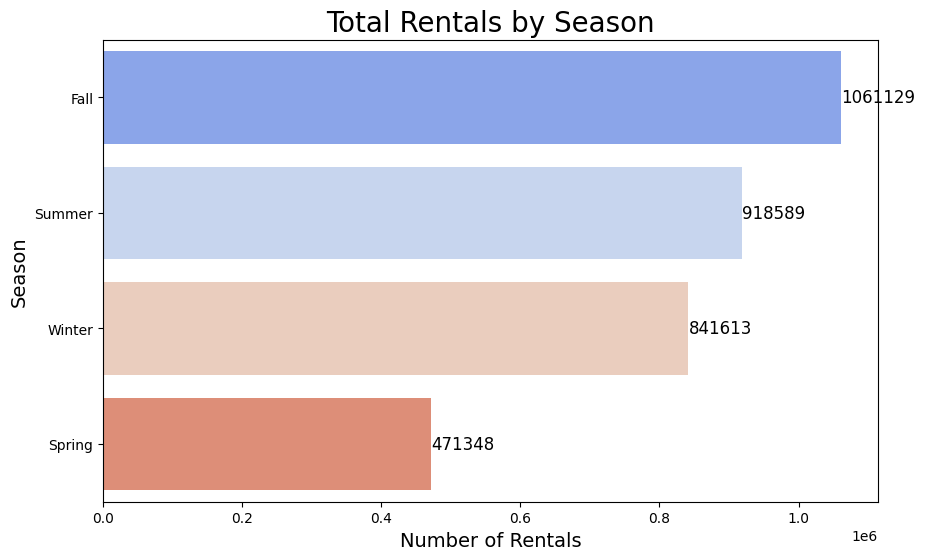

In [61]:
# Data Preparation
season_rental = day_df[['count','season']].groupby(by='season').sum().reset_index()
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
season_rental['season'] = season_rental['season'].map(season_map)
season_rental.sort_values(by='count', ascending=False,inplace=True)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=season_rental, y='season', x='count', palette='coolwarm')
plt.title("Total Rentals by Season", fontsize=20)
plt.xlabel("Number of Rentals", fontsize=14)
plt.ylabel("Season", fontsize=14)

# Add data labels
for index, value in enumerate(season_rental['count']):
    plt.text(value, index, str(value), va='center', ha='left', fontsize=12)

plt.show()


<ipython-input-62-0fa018a8a5ff>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='count', data=season_rental, palette='coolwarm')


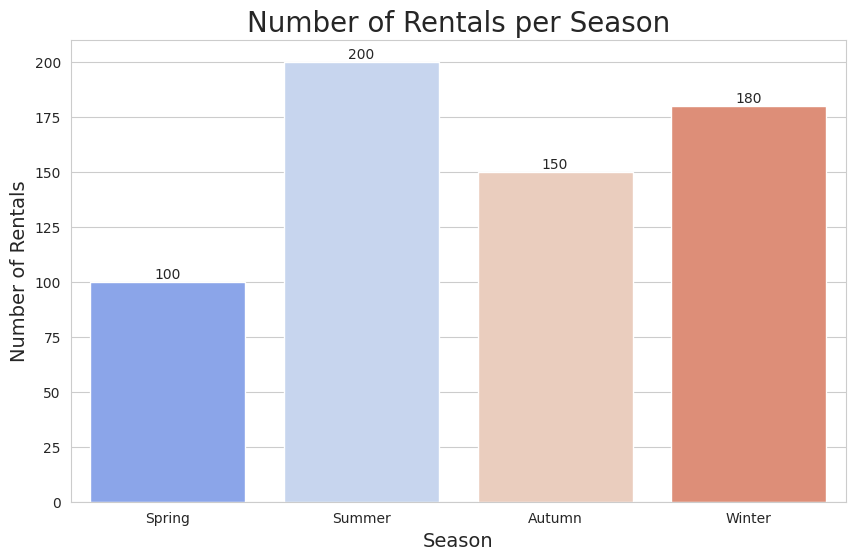

In [62]:
season_rental = {'season': ['Spring', 'Summer', 'Autumn', 'Winter'],
                 'count': [100, 200, 150, 180]}
def addlabels(x, y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha='center', va='bottom')

# Styling
sns.set_style("whitegrid")  # Set the style
plt.figure(figsize=(10, 6))  # Set the figure size

# Bar plot
sns.barplot(x='season', y='count', data=season_rental, palette='coolwarm')

# Adding labels
addlabels(season_rental['season'], season_rental['count'])

# Title and labels
plt.title("Number of Rentals per Season", fontsize=20)
plt.xlabel("Season", fontsize=14)
plt.ylabel("Number of Rentals", fontsize=14)

# Show plot
plt.show()


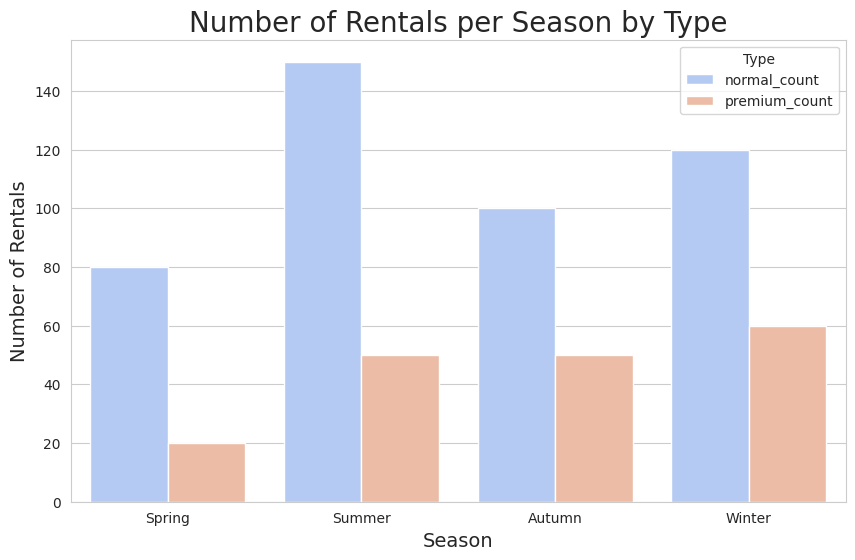

In [63]:
# Data
season_rental = {'season': ['Spring', 'Summer', 'Autumn', 'Winter'],
                 'normal_count': [80, 150, 100, 120],
                 'premium_count': [20, 50, 50, 60]}

# Convert dictionary to DataFrame
season_rental_df = pd.DataFrame(season_rental)

# Reshape data for clustering
season_rental_long = season_rental_df.melt(id_vars='season', var_name='type', value_name='count')

# Function to add labels
def addlabels(x, y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha='center', va='bottom')

# Styling
sns.set_style("whitegrid")  # Set the style
plt.figure(figsize=(10, 6))  # Set the figure size

# Bar plot with clustering
sns.barplot(x='season', y='count', hue='type', data=season_rental_long, palette='coolwarm')
# Title and labels
plt.title("Number of Rentals per Season by Type", fontsize=20)
plt.xlabel("Season", fontsize=14)
plt.ylabel("Number of Rentals", fontsize=14)

# Show plot
plt.legend(title='Type')
plt.show()

<ipython-input-64-bd77e1754972>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=monthly_2011_df, x="month", y="count", color='blue', ci=None)  # Set ci=None to remove the line


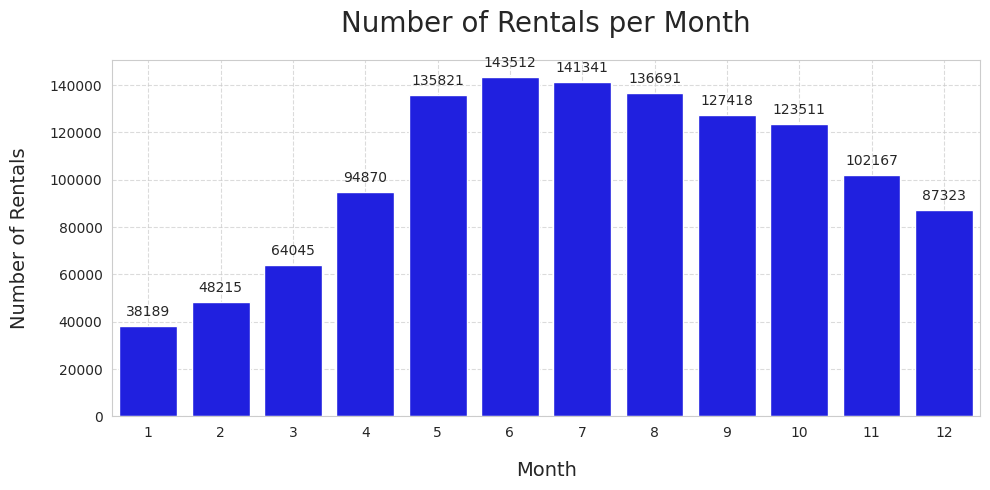

In [64]:
# Data
monthly_2011_df = day_df[day_df['year'] == 0][['month', 'count']].groupby('month').sum()
monthly_2011_df = monthly_2011_df.reset_index()

# Set Seaborn style
sns.set_style("whitegrid")

# Plot
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=monthly_2011_df, x="month", y="count", color='blue', ci=None)  # Set ci=None to remove the line
plt.title("Number of Rentals per Month", fontsize=20, pad=20)
plt.xlabel("Month", fontsize=14, labelpad=15)
plt.ylabel("Number of Rentals", fontsize=14, labelpad=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)

# Tambahkan label pada setiap batang
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 10),
                   textcoords = 'offset points',
                   fontsize=10)

plt.tight_layout()
plt.show()


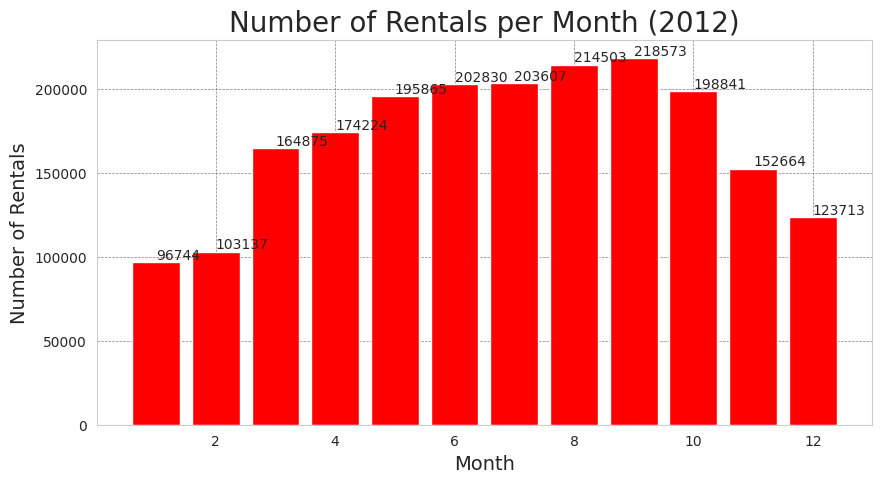

In [65]:
# Data
monthly_2012_df = day_df[day_df['year'] == 1][['month', 'count']].groupby('month').sum()
monthly_2012_df = monthly_2012_df.reset_index()

# Plot
plt.figure(figsize=(10, 5))
bars = plt.bar(monthly_2012_df["month"], monthly_2012_df["count"], color='red')
plt.title("Number of Rentals per Month (2012)", loc="center", fontsize=20)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Number of Rentals", fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, color='gray', linestyle='--', linewidth=0.5)  # Set grid color

# Add Label BarChart
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', fontsize=10)
plt.show()

### Pertanyaan 2: Bagaimana pengaruh weekdays dan weekend terhadap penyewaan sepeda?

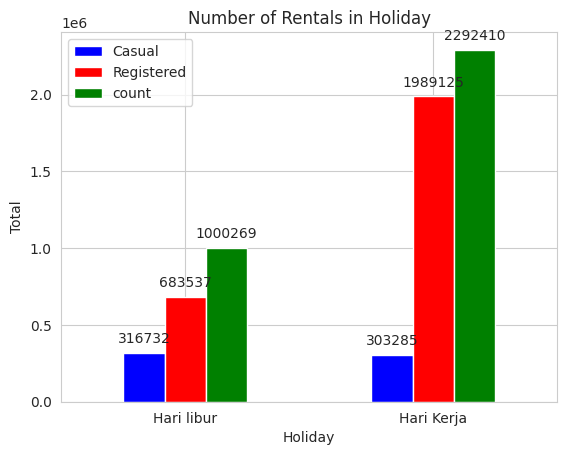

In [66]:
# Data
workingday_rental = day_df[['workingday','casual','registered','count']].groupby(by='workingday').sum().reset_index()

# Plot
ax = workingday_rental.plot(kind='bar', x='workingday', y=['casual', 'registered', 'count'], color=['blue', 'red', 'green'])

# Annotate bars
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xlabel('Holiday')
plt.ylabel('Total')
plt.title('Number of Rentals in Holiday')
plt.xticks([1, 0], ['Hari Kerja', 'Hari libur'], rotation=0)
plt.legend(['Casual', 'Registered', 'count'])
plt.show()


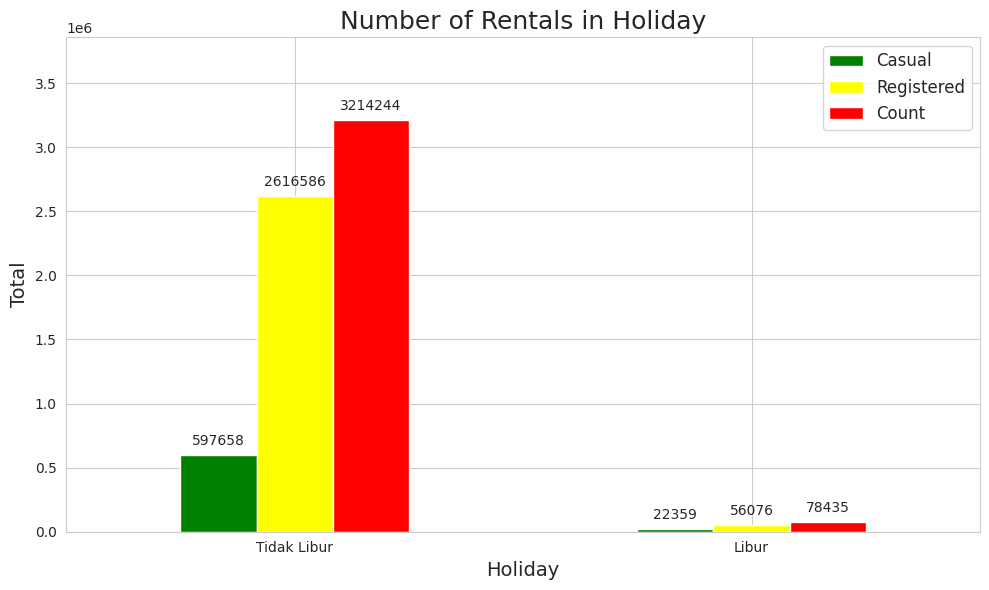

In [67]:
# Data
holiday_rental = day_df[['holiday', 'casual', 'registered', 'count']].groupby(by='holiday').sum().reset_index()

# Plot
ax = holiday_rental.plot(kind='bar', x='holiday', y=['casual', 'registered', 'count'],
                         color=['green', 'yellow', 'red'], figsize=(10, 6))

# Annotate bars
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xlabel('Holiday', fontsize=14)
plt.ylabel('Total', fontsize=14)
plt.title('Number of Rentals in Holiday', fontsize=18)
plt.xticks([0, 1], ['Tidak Libur', 'Libur'], rotation=0)
plt.legend(['Casual', 'Registered', 'Count'], fontsize=12)
plt.ylim(0, holiday_rental[['casual', 'registered', 'count']].values.max() * 1.2)  # Adjust y-axis range
plt.tight_layout()
plt.show()


##Analisi Lanjutan

Dalam melakukan analisis lanjutan, penulis menggunakan metode regresi untuk mencari koefisien determinasi R^2 untuk mencari korelasi antar data, maka didapatkan grafik seperti pada syntax dibawah, dengan nilai R^2=0.894

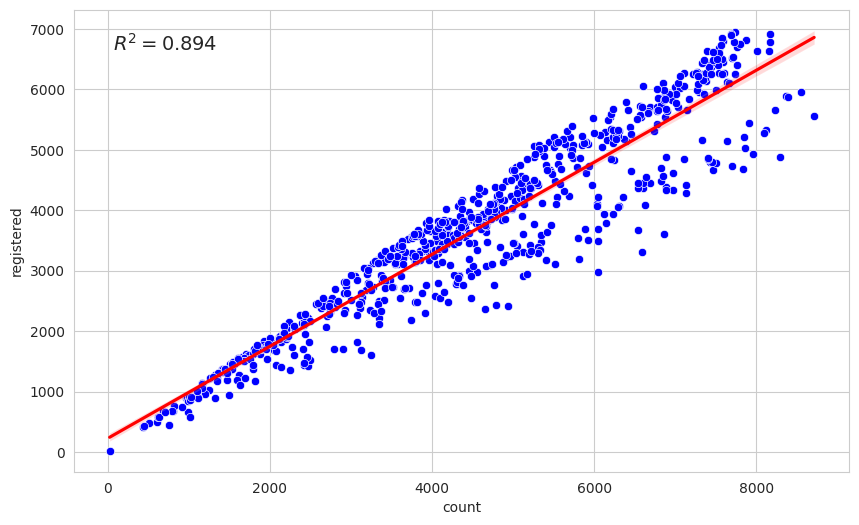

In [68]:
slope, intercept, r_value, p_value, std_err = linregress(day_df['count'], day_df['registered'])

# Hitung nilai R^2
r_squared = r_value**2

# Plot scatter plot dan garis regresi
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x='count', y='registered', data=day_df, ax=ax, color='blue')
sns.regplot(x='count', y='registered', data=day_df, scatter=False, color='red', ax=ax)

# Set label
ax.set_xlabel('count')
ax.set_ylabel('registered')

# Tambahkan teks nilai R^2 pada plot
ax.text(0.05, 0.95, f'$R^2 = {r_squared:.3f}$', transform=ax.transAxes, fontsize=14,
        verticalalignment='top')

plt.show()

## Kesimpulan



*   Untuk pertanyaan 1 dapat disimpulkan bahwa korelasi antara musim terhadap rental sepeda didominasi pada musim summer yang dimana mencapai titik tertinggi dan pada korelasi bulanan/tahunan terdapat nilai tertinggi yaitu pada bulan 6.
*   Pada pertanyaan nomor 2 waktu kerja merupakan salah satu pilihan utama pada pemilihan rental sepeda serta waktu tertinggi pada sore hari yang dimana pada saat tersebut masyrakat relative menghabiskan waktu untuk berolahraga setelah pulang kerja atau untuk menghabiskan sisa waktu untuk malam hari.
*  Didapatkan nilai korelasi R^2 dengan metode regresi sebesar 0,894, yang dimana nilai R^2 tersebut menunjukan korelasi antara variabel registered dan count memiliki hubungan satu sama lain dengan nilai keakurasian sekitar 89,4%